<a href="https://colab.research.google.com/github/DARWICHAli/notebooks/blob/main/energy_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget -c https://www.data.gouv.fr/fr/datasets/r/d33eabc9-e2fd-4787-83e5-a5fcfb5af66d -O data.csv


--2024-02-20 17:22:54--  https://www.data.gouv.fr/fr/datasets/r/d33eabc9-e2fd-4787-83e5-a5fcfb5af66d
Resolving www.data.gouv.fr (www.data.gouv.fr)... 37.59.183.93
Connecting to www.data.gouv.fr (www.data.gouv.fr)|37.59.183.93|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://opendata.agenceore.fr/api/explore/v2.1/catalog/datasets/conso-elec-gaz-annuelle-par-naf-agregee-region/exports/csv [following]
--2024-02-20 17:22:54--  https://opendata.agenceore.fr/api/explore/v2.1/catalog/datasets/conso-elec-gaz-annuelle-par-naf-agregee-region/exports/csv
Resolving opendata.agenceore.fr (opendata.agenceore.fr)... 5.104.97.33, 109.232.232.161
Connecting to opendata.agenceore.fr (opendata.agenceore.fr)|5.104.97.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘data.csv’

data.csv                [             <=>    ]   2.27M   762KB/s    in 3.1s    

2024-02-20 17:22:58 (762 KB/s) - ‘data.csv’ saved [

In [72]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [4]:
df = pd.read_csv('data.csv',sep=";")

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18128 entries, 0 to 18127
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   operateur                       18128 non-null  object 
 1   annee                           18128 non-null  int64  
 2   filiere                         18128 non-null  object 
 3   code_categorie_consommation     18128 non-null  object 
 4   libelle_categorie_consommation  18128 non-null  object 
 5   code_grand_secteur              18128 non-null  object 
 6   libelle_grand_secteur           18128 non-null  object 
 7   code_naf                        11143 non-null  float64
 8   libelle_secteur_naf2            18128 non-null  object 
 9   conso                           18128 non-null  float64
 10  pdl                             18128 non-null  int64  
 11  indqual                         18128 non-null  float64
 12  nombre_mailles_secretisees      

In [6]:
df

,operateur,annee,filiere,code_categorie_consommation,libelle_categorie_consommation,code_grand_secteur,libelle_grand_secteur,code_naf,libelle_secteur_naf2,conso,pdl,indqual,nombre_mailles_secretisees,code_region,libelle_region
0,Régie intercommunale d'électricité de Niederbr...,2021,Electricité,PRO,Petits professionels,A,Agriculture,NaN,0,115.36200,9,0.49100,0,44,Grand Est
1,Régie Municipale Bazas-Energies,2021,Electricité,RES,Résidentiel,R,Résidentiel,NaN,0,12471.47100,2634,0.00721,0,75,Nouvelle-Aquitaine
2,Régie municipale d'électricité d'Arignac,2021,Electricité,ENT,Entreprises,T,Tertiaire,94.0,Activités des organisations associatives,493.00000,1,1.00000,0,76,Occitanie
3,Régie municipale d'électricité d'Arignac,2021,Electricité,PRO,Petits professionels,I,Industrie,NaN,0,0.00000,0,0.00000,1,76,Occitanie
4,Régie municipale d'électricité d'Arignac,2021,Electricité,PRO,Petits professionels,T,Tertiaire,NaN,0,385.00000,52,1.00000,0,76,Occitanie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18123,GRDF,2020,Gaz,ENT,Entreprises,I,Industrie,32.0,Autres industries manufacturières,6616.55310,11,0.00000,0,44,Grand Est
18124,GRDF,2020,Gaz,ENT,Entreprises,I,Industrie,41.0,Construction de bâtiments,14767.57223,19,0.00000,0,44,Grand Est
18125,GRDF,2020,Gaz,ENT,Entreprises,I,Industrie,42.0,Génie civil,14189.97063,7,0.00000,0,44,Grand Est
18126,GRDF,2020,Gaz,ENT,Entreprises,T,Tertiaire,45.0,Commerce et réparation d'automobiles et de mot...,60483.28437,144,0.00000,0,44,Grand Est


In [48]:
df.annee.value_counts()

2021    5141
2020    4379
2019    2509
2018    2106
2017     790
2016     741
2015     728
2013     474
2014     468
2012     423
2011     369
Name: annee, dtype: int64

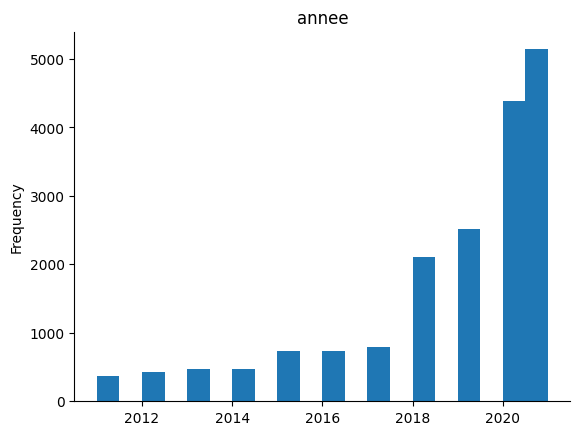

In [56]:
# @title annee

from matplotlib import pyplot as plt
df['annee'].plot(kind='hist', bins=20, title='annee')
plt.gca().spines[['top', 'right',]].set_visible(False)

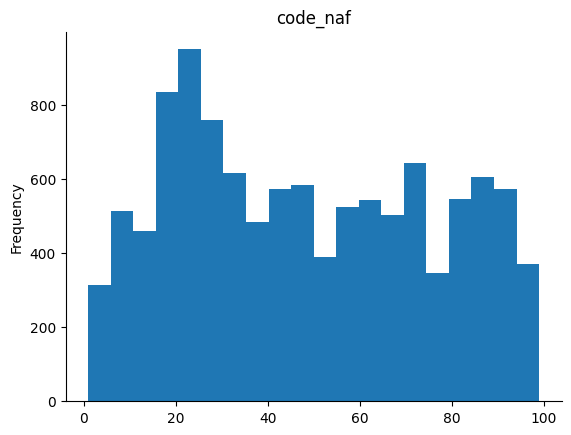

In [8]:
# @title code_naf

from matplotlib import pyplot as plt
df['code_naf'].plot(kind='hist', bins=20, title='code_naf')
plt.gca().spines[['top', 'right',]].set_visible(False)

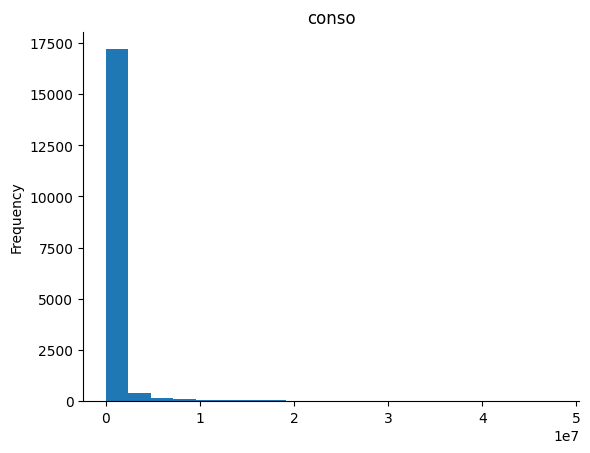

In [9]:
# @title conso

from matplotlib import pyplot as plt
df['conso'].plot(kind='hist', bins=20, title='conso')
plt.gca().spines[['top', 'right',]].set_visible(False)

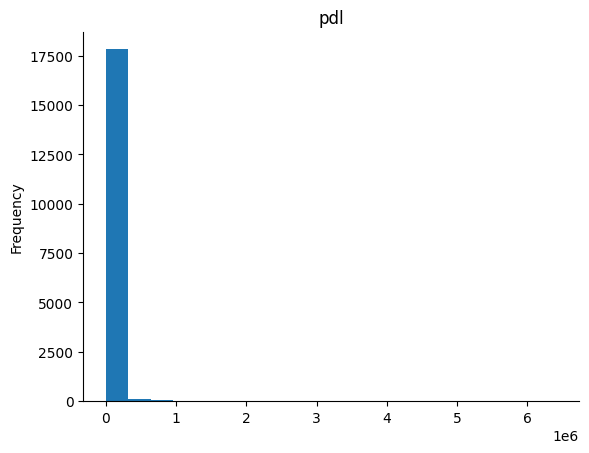

In [10]:
# @title pdl

from matplotlib import pyplot as plt
df['pdl'].plot(kind='hist', bins=20, title='pdl')
plt.gca().spines[['top', 'right',]].set_visible(False)

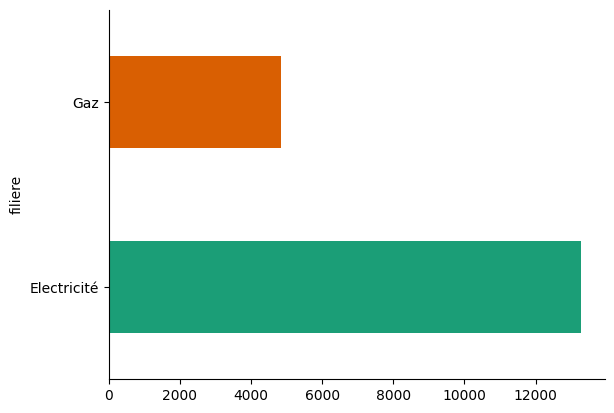

In [11]:
# @title filiere

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('filiere').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

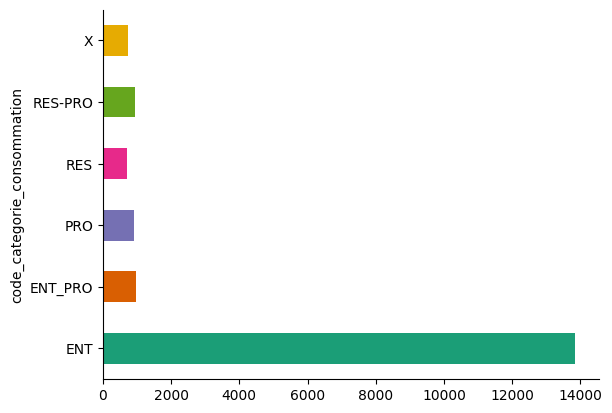

In [12]:
# @title code_categorie_consommation

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('code_categorie_consommation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

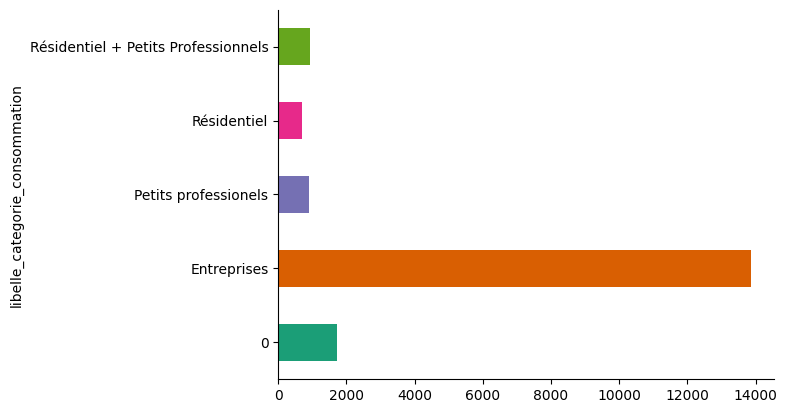

In [13]:
# @title libelle_categorie_consommation

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('libelle_categorie_consommation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

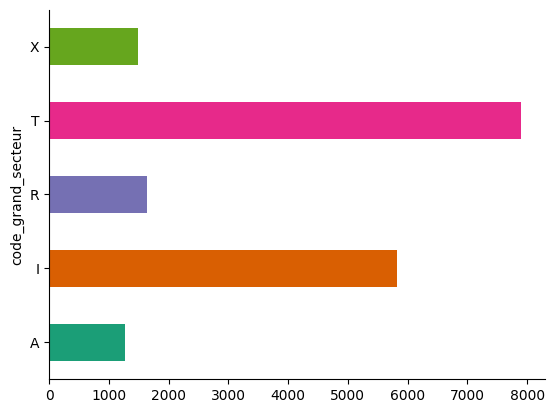

In [14]:
# @title code_grand_secteur

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('code_grand_secteur').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

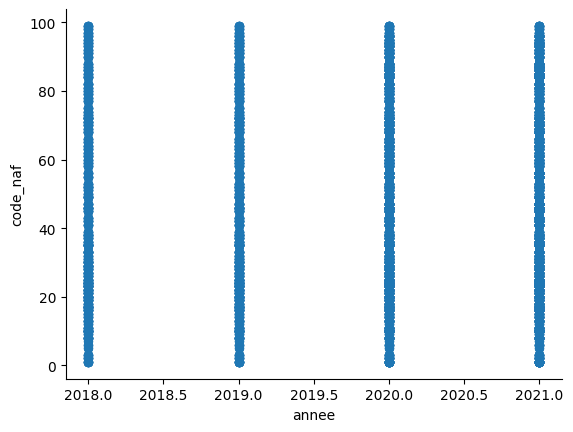

In [15]:
# @title annee vs code_naf

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='annee', y='code_naf', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

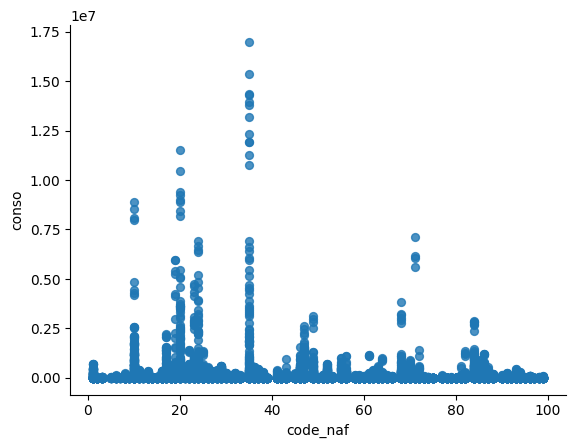

In [16]:
# @title code_naf vs conso

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='code_naf', y='conso', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

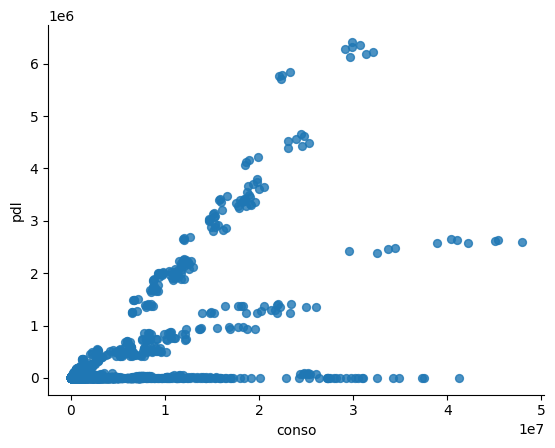

In [17]:
# @title conso vs pdl

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='conso', y='pdl', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

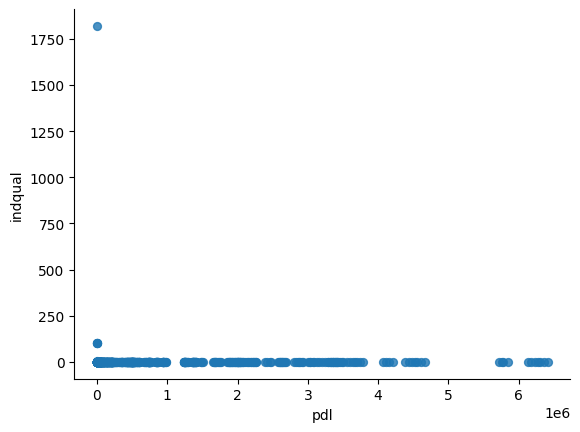

In [18]:
# @title pdl vs indqual

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='pdl', y='indqual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

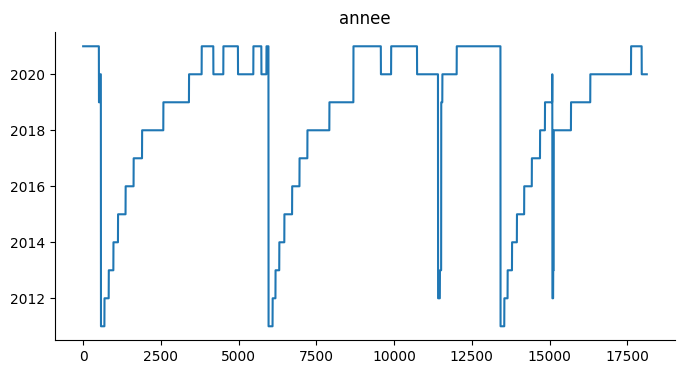

In [19]:
# @title annee

from matplotlib import pyplot as plt
df['annee'].plot(kind='line', figsize=(8, 4), title='annee')
plt.gca().spines[['top', 'right']].set_visible(False)

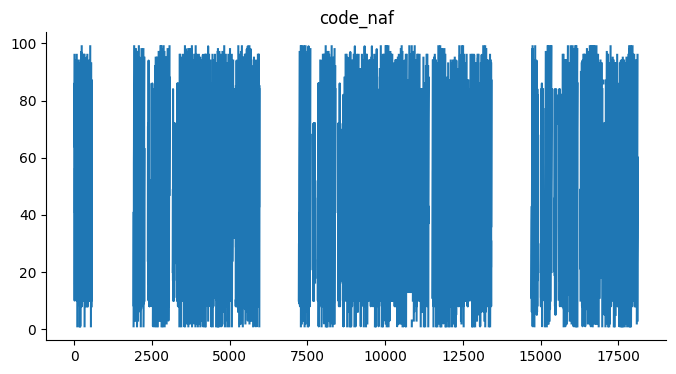

In [20]:
# @title code_naf

from matplotlib import pyplot as plt
df['code_naf'].plot(kind='line', figsize=(8, 4), title='code_naf')
plt.gca().spines[['top', 'right']].set_visible(False)

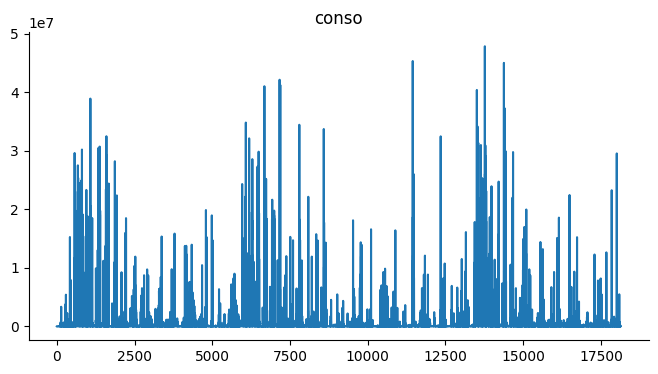

In [21]:
# @title conso

from matplotlib import pyplot as plt
df['conso'].plot(kind='line', figsize=(8, 4), title='conso')
plt.gca().spines[['top', 'right']].set_visible(False)

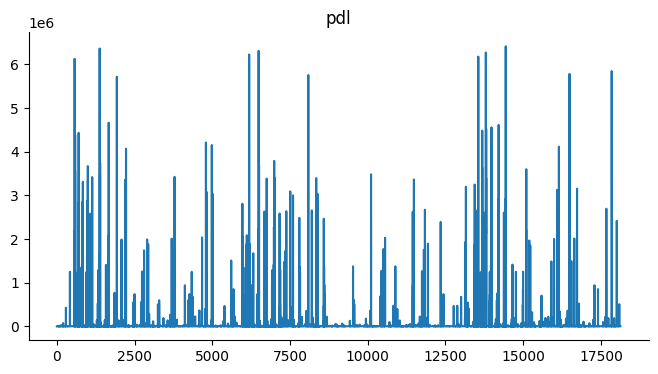

In [22]:
# @title pdl

from matplotlib import pyplot as plt
df['pdl'].plot(kind='line', figsize=(8, 4), title='pdl')
plt.gca().spines[['top', 'right']].set_visible(False)

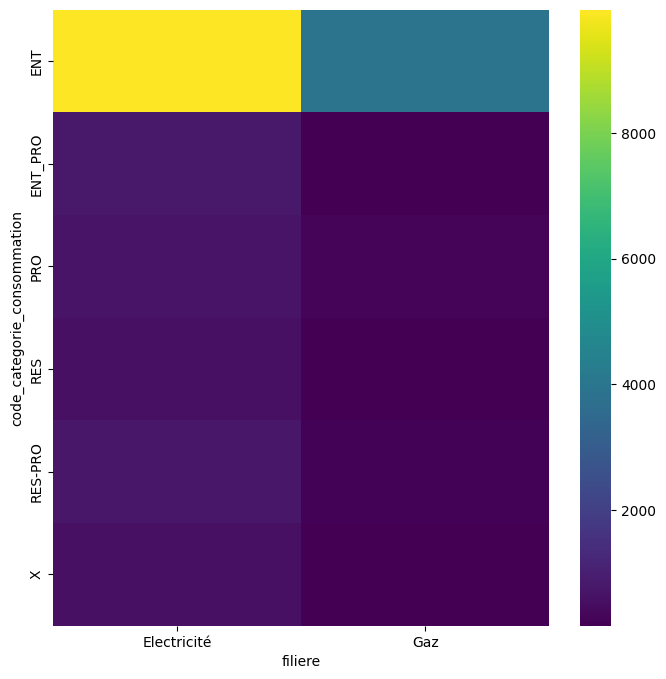

In [23]:
# @title filiere vs code_categorie_consommation

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['code_categorie_consommation'].value_counts()
    for x_label, grp in df.groupby('filiere')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('filiere')
_ = plt.ylabel('code_categorie_consommation')

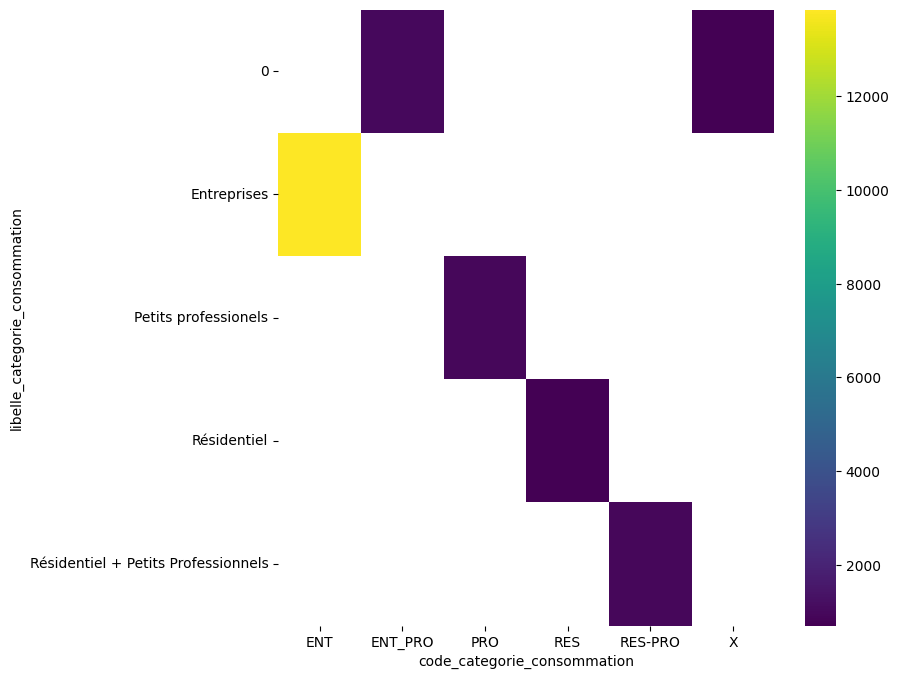

In [24]:
# @title code_categorie_consommation vs libelle_categorie_consommation

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['libelle_categorie_consommation'].value_counts()
    for x_label, grp in df.groupby('code_categorie_consommation')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('code_categorie_consommation')
_ = plt.ylabel('libelle_categorie_consommation')

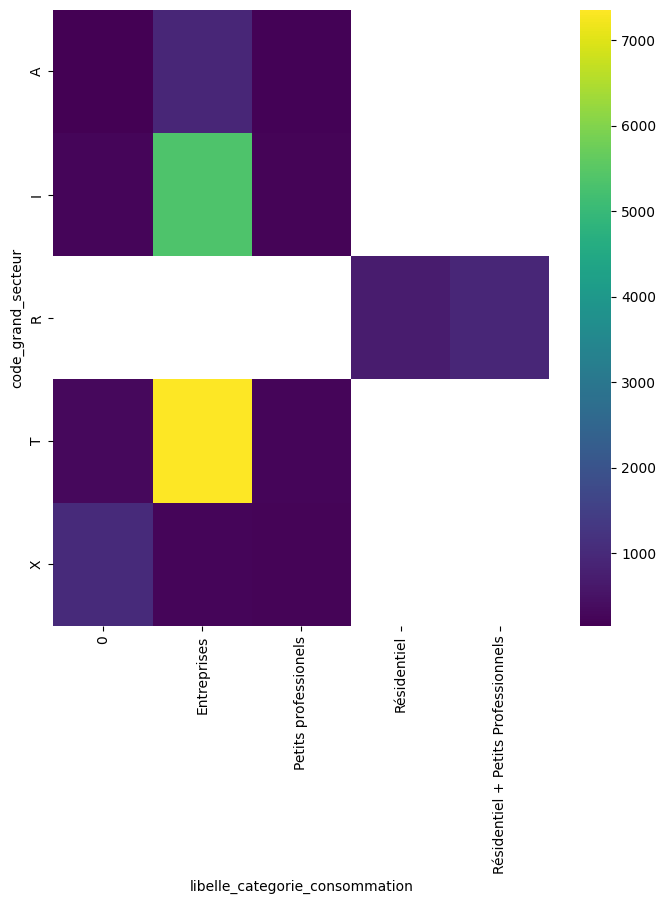

In [25]:
# @title libelle_categorie_consommation vs code_grand_secteur

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['code_grand_secteur'].value_counts()
    for x_label, grp in df.groupby('libelle_categorie_consommation')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('libelle_categorie_consommation')
_ = plt.ylabel('code_grand_secteur')

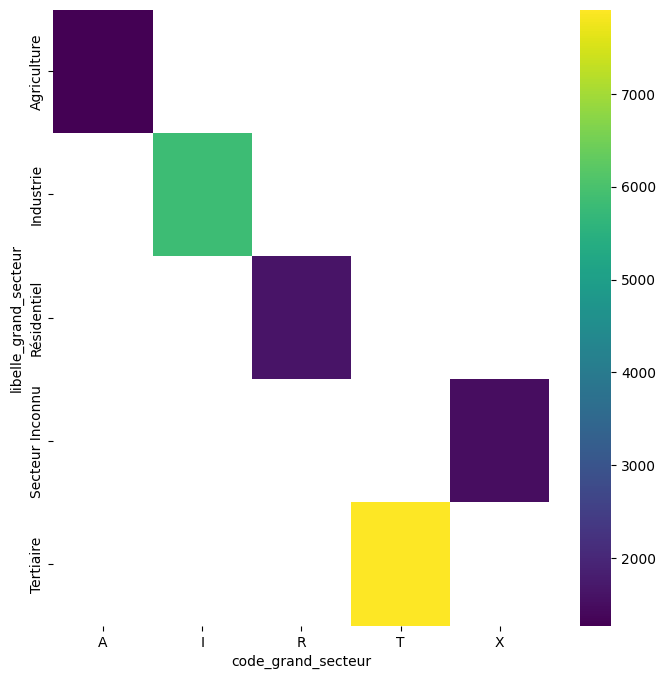

In [26]:
# @title code_grand_secteur vs libelle_grand_secteur

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['libelle_grand_secteur'].value_counts()
    for x_label, grp in df.groupby('code_grand_secteur')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('code_grand_secteur')
_ = plt.ylabel('libelle_grand_secteur')

<ipython-input-27-78668e6cbf2c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='annee', y='filiere', inner='box', palette='Dark2')


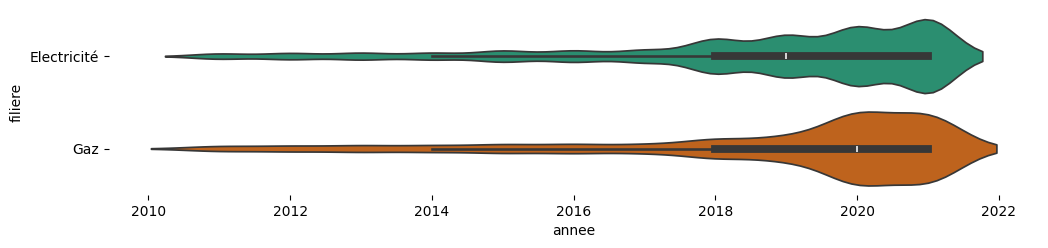

In [27]:
# @title filiere vs annee

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['filiere'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='annee', y='filiere', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-28-d58af7b1ca9a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='annee', y='code_categorie_consommation', inner='box', palette='Dark2')


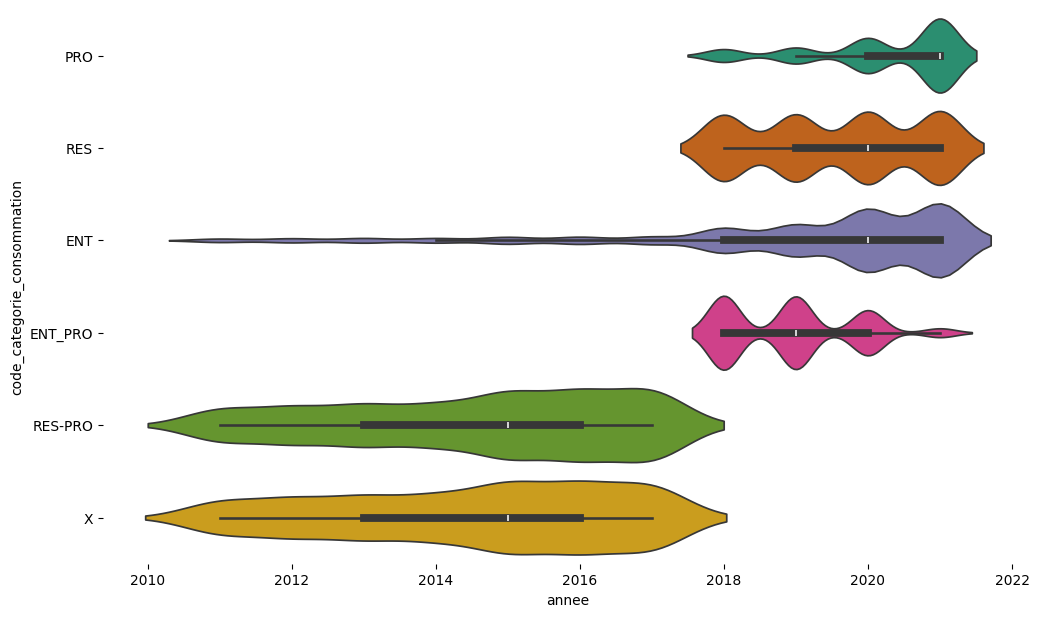

In [28]:
# @title code_categorie_consommation vs annee

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['code_categorie_consommation'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='annee', y='code_categorie_consommation', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-29-425ef66f62da>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='annee', y='libelle_categorie_consommation', inner='box', palette='Dark2')


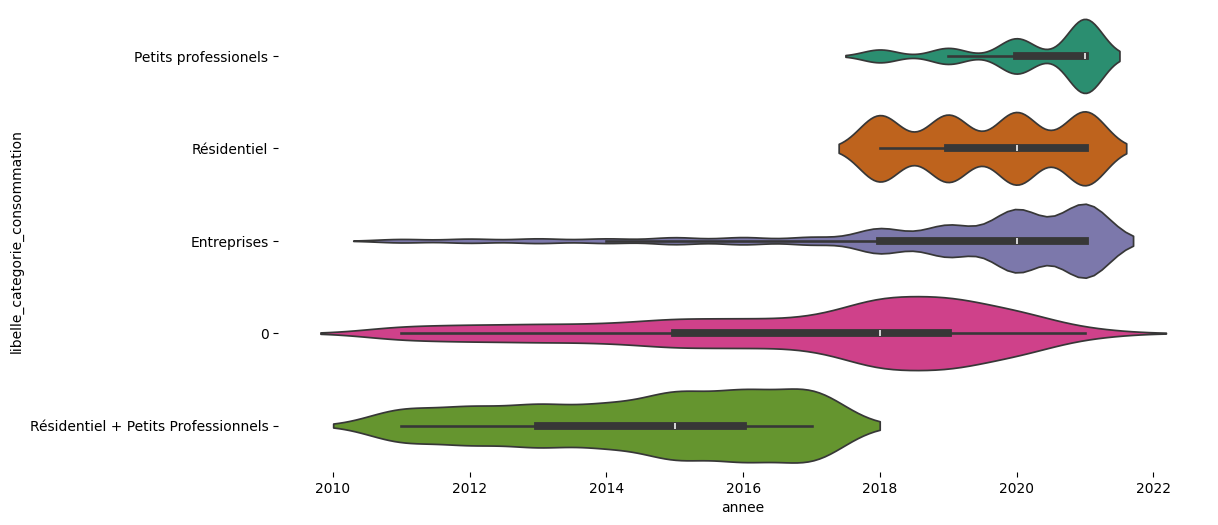

In [29]:
# @title libelle_categorie_consommation vs annee

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['libelle_categorie_consommation'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='annee', y='libelle_categorie_consommation', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-30-43b197ddaaed>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='annee', y='code_grand_secteur', inner='box', palette='Dark2')


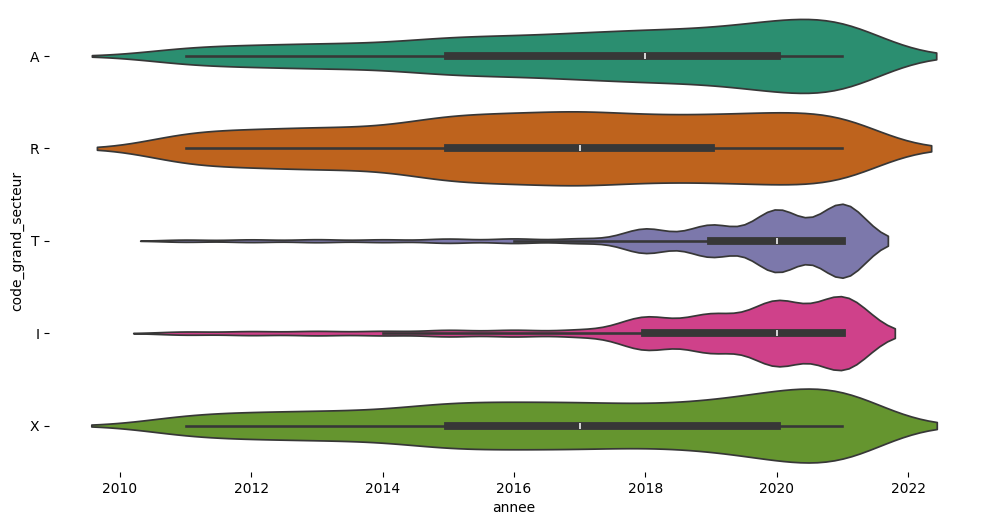

In [30]:
# @title code_grand_secteur vs annee

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['code_grand_secteur'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='annee', y='code_grand_secteur', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [73]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11143 entries, 2 to 18127
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   operateur                       11143 non-null  object 
 1   annee                           11143 non-null  int64  
 2   filiere                         11143 non-null  object 
 3   code_categorie_consommation     11143 non-null  object 
 4   libelle_categorie_consommation  11143 non-null  object 
 5   code_grand_secteur              11143 non-null  object 
 6   libelle_grand_secteur           11143 non-null  object 
 7   code_naf                        11143 non-null  float64
 8   libelle_secteur_naf2            11143 non-null  object 
 9   conso                           11143 non-null  float64
 10  pdl                             11143 non-null  int64  
 11  indqual                         11143 non-null  float64
 12  nombre_mailles_secretisees      

['operateur', 'filiere', 'code_categorie_consommation', 'libelle_categorie_consommation', 'code_grand_secteur', 'libelle_grand_secteur', 'libelle_secteur_naf2', 'code_region', 'libelle_region']


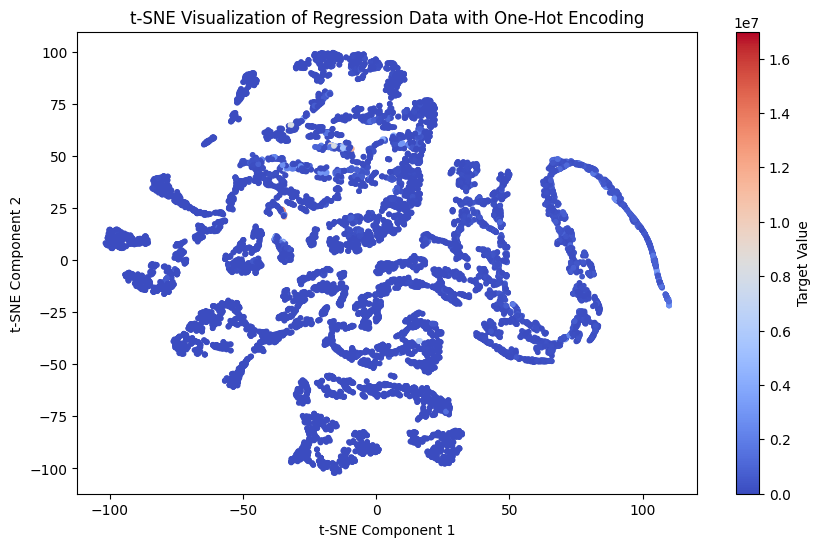

In [84]:

# # Split the data into features and target variable
# y = X_encoded.conso
# X = X_encoded.drop(columns='conso')

# Perform one-hot encoding using get_dummies

cat = [x for x in df.columns if df[x].dtype == 'object']
print(cat)
df_encoded = pd.get_dummies(df, columns=cat, drop_first=True)  # drop_first=True to avoid multicollinearity

# Split the data into features and target variable
X = df_encoded.drop(columns=['conso'])  # All columns except 'numeric1' (features)
y = df_encoded['conso']  # The 'numeric1' column (target variable)




# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the data using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.coolwarm, s=10)
plt.colorbar(label='Target Value')
plt.title('t-SNE Visualization of Regression Data with One-Hot Encoding')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 224703.12785316815
Mean Squared Error (MSE): 528075262308.52435
Root Mean Squared Error (RMSE): 726687.8713096321
R-squared (R2): 0.2248217273719304


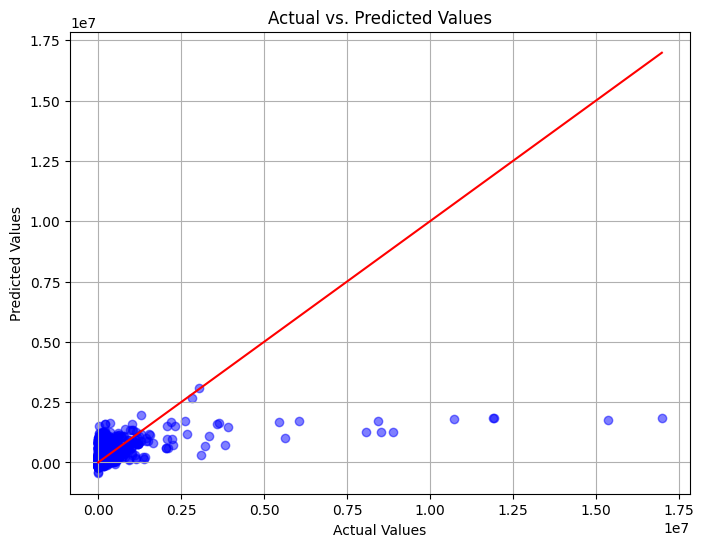

In [86]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Scatter plot of actual vs. predicted values
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # Diagonal line representing perfect predictions
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


In [88]:
!pip install lazypredict


In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn.datasets import make_regression


# Initialize LazyRegressor
reg = LazyRegressor(predictions=True)

# Fit and display models
models, predictions = reg.fit(X_train, X_test, y_train, y_test)


In [90]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.96,0.97,151295.13,24.84
XGBRegressor,0.96,0.96,161746.71,0.62
BaggingRegressor,0.95,0.96,174403.48,3.04
DecisionTreeRegressor,0.95,0.95,175169.27,0.43
ExtraTreeRegressor,0.95,0.95,177190.54,0.43
RandomForestRegressor,0.94,0.95,184891.95,16.99
HistGradientBoostingRegressor,0.86,0.87,297724.06,3.29
LGBMRegressor,0.85,0.87,302595.05,0.43
GaussianProcessRegressor,0.76,0.78,383524.82,136.57


In [127]:


pred = predictions[['ExtraTreesRegressor','XGBRegressor','BaggingRegressor']]

# Reset index for both dataframes
y_test.reset_index(drop=True, inplace=True)
pred.reset_index(drop=True, inplace=True)

combined_df = pd.concat([y_test, pred], axis=1)


In [128]:
combined_df


,conso,ExtraTreesRegressor,XGBRegressor,BaggingRegressor
0,13429.58,14599.76,15384.08,15362.02
1,90237.53,104721.15,106697.77,159331.75
2,17367.82,482.74,5371.25,1371.09
3,928.92,1196.96,1367.86,1334.32
4,92145.09,96497.66,104940.33,107351.46
...,...,...,...,...
2224,5696.56,5935.73,5311.96,6128.36
2225,62186.18,71709.52,60519.29,75916.38
2226,3650.11,4250.52,-498.96,4089.41
2227,71571.81,81017.66,60371.09,71293.10


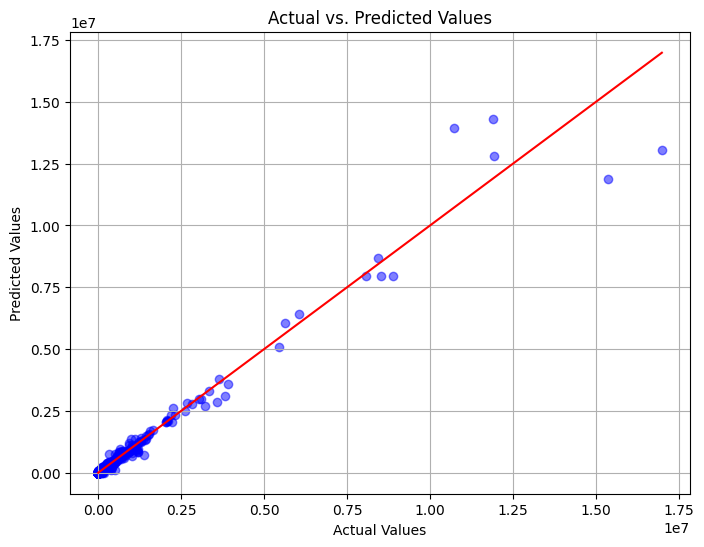

In [130]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, combined_df['ExtraTreesRegressor'], color='blue', alpha=0.5)  # Scatter plot of actual vs. predicted values
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # Diagonal line representing perfect predictions
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()